# Data Analysis

## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [6]:
df =pd.read_csv("E:\IIT Chicago\Sem 3\Data Preparation and Analysis - CSP 571\Project\Final Submission\processed_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Siddhant\AppData\Local\Temp\ipykernel_36732\3531661444.py:1: SyntaxWarning: invalid escape sequence '\I'
  df =pd.read_csv("E:\IIT Chicago\Sem 3\Data Preparation and Analysis - CSP 571\Project\Final Submission\processed_data.csv")


## Key Point:
1. From data processing step we know there still some collinearity present among features in dataset.
2. There are small number of outliers present.

## Statistics of the data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
B,1100721.0,-16.068675,11.458848,-79.818540,-16.472375,-13.185011,-10.269057,4.448094
D,1100430.0,-4.575403,37.739353,-137.490156,-13.854122,15.537243,19.860570,31.834998
F,1200000.0,-6.185094,73.090396,-148.591728,-30.724916,-24.753910,78.344167,122.918640
I,1200000.0,33.000786,42.170910,-17.435460,-7.594991,37.693692,79.848418,111.297012
J,1200000.0,40.925468,76.943261,-112.384444,21.080443,27.174324,125.384611,175.539703
L,1126269.0,-4.495122,13.229068,-62.718276,-6.855543,-0.467106,3.600674,20.122918
M,1200000.0,-42.322835,17.910749,-81.449877,-55.673263,-52.975847,-22.085038,10.328284
Class,1200000.0,2.324106,0.721146,1.000000,2.000000,2.000000,3.000000,3.000000


### Observation:
1. The dataset's statistics reveal significant variation in the minimum and maximum values across columns.
2. Many feature columns have the large standard deviation values.

## Check for class balance of target variable

In [8]:
df['Class'].value_counts()

Class
3    569521
2    449885
1    180594
Name: count, dtype: int64

### Observation:
The taget column 'Class' is imbalanced. 

# Checking distribution of the data:

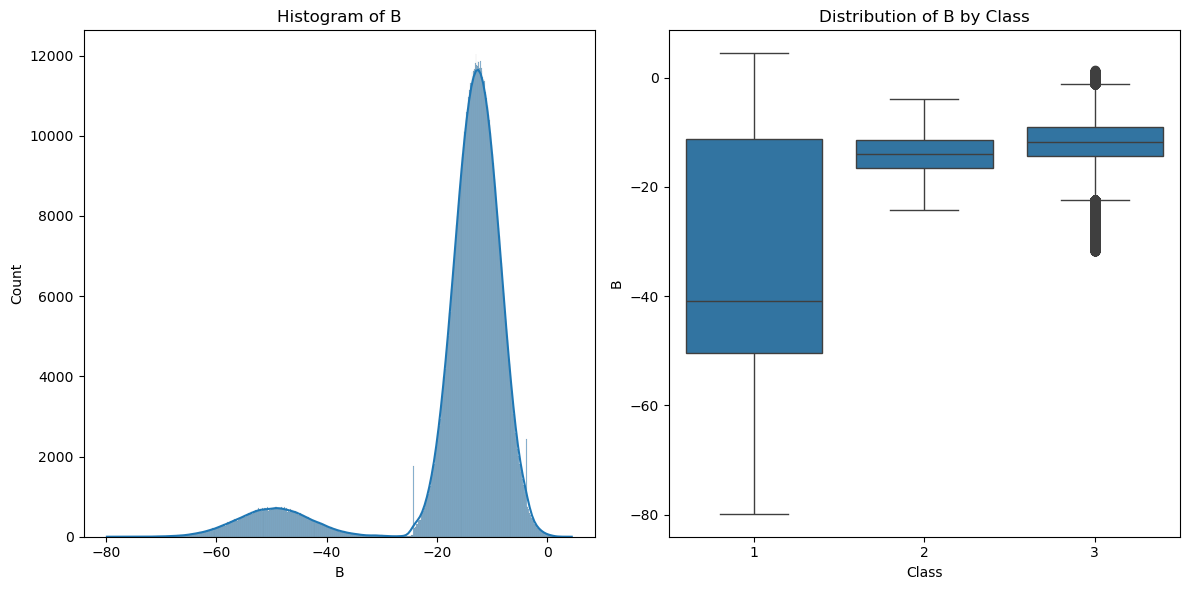

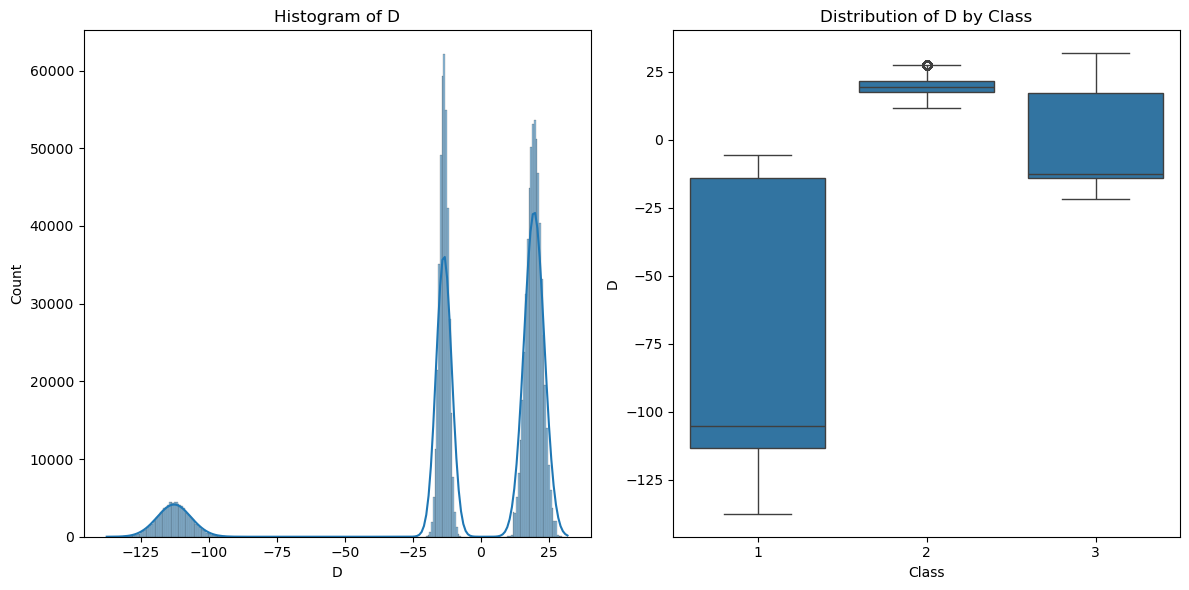

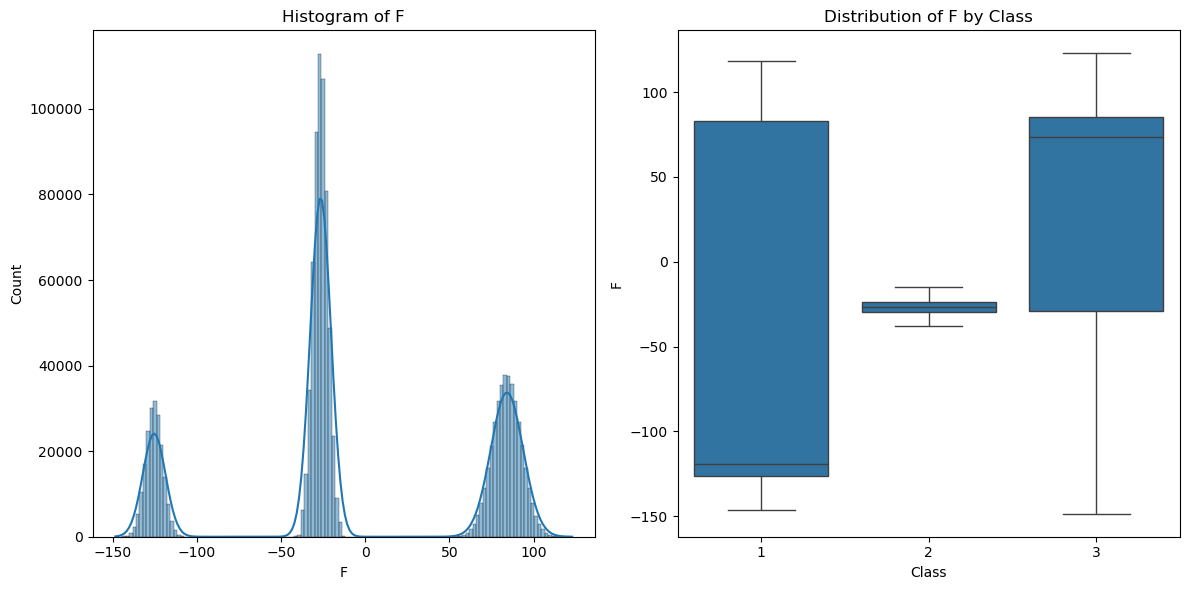

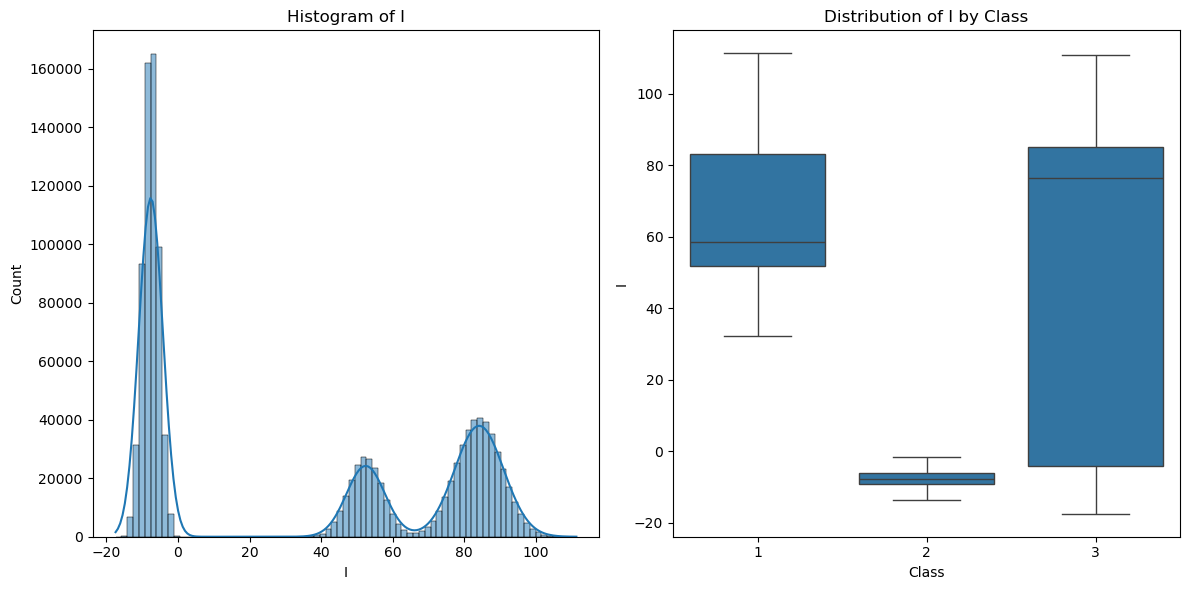

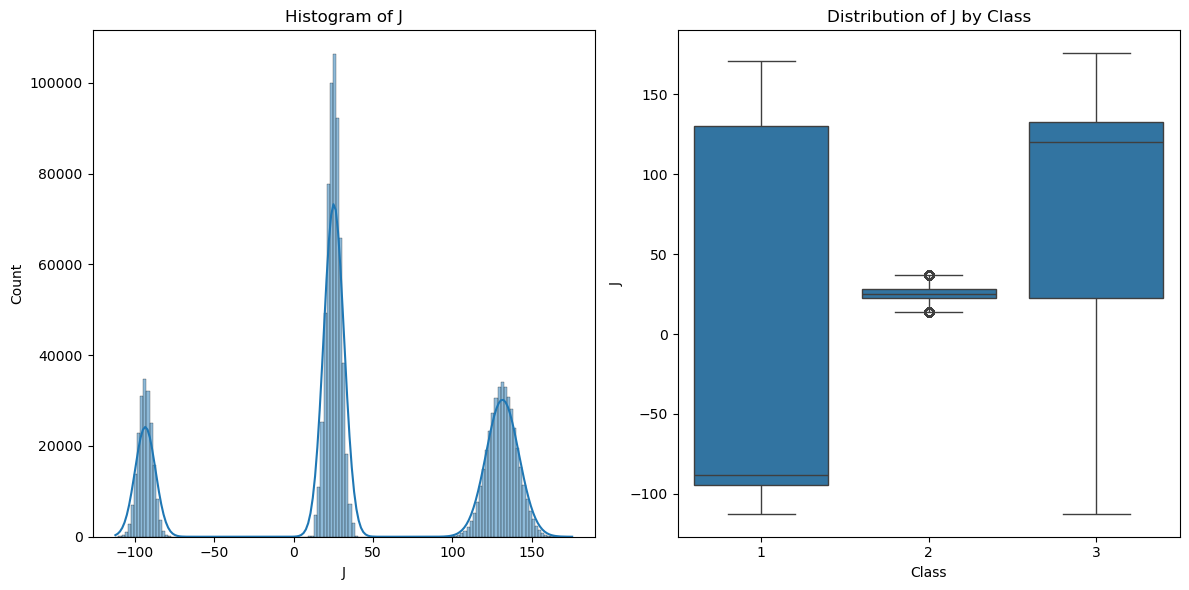

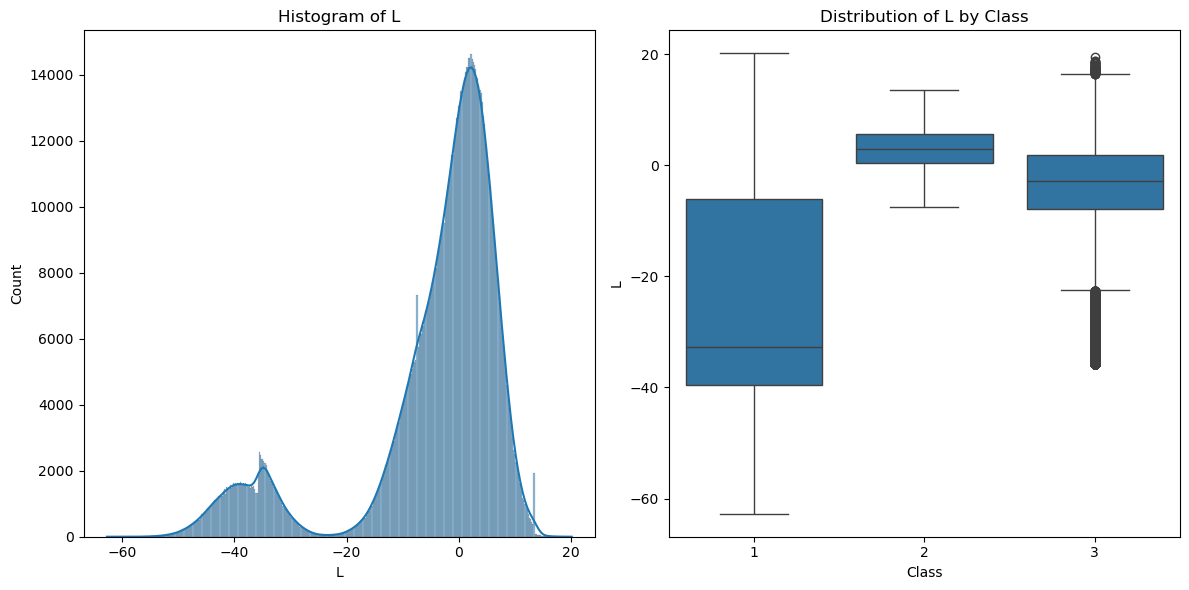

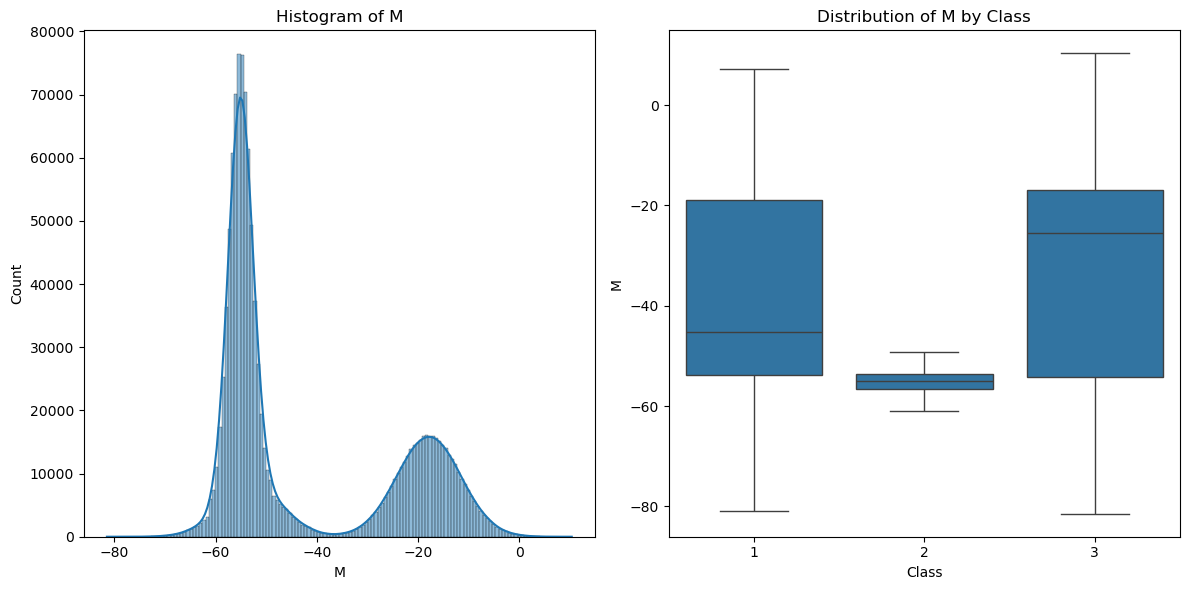

In [9]:
for feature in df.drop(columns=['Class']).columns:
    # Create a subplot with 1 row and 2 columns
    plt.figure(figsize=(12, 6))
    
    # First subplot: Histogram
    plt.subplot(1, 2, 1)  # (rows, columns, position)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Histogram of {feature}")
    
    # Second subplot: Boxplot by Class
    plt.subplot(1, 2, 2)  # (rows, columns, position)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f"Distribution of {feature} by Class")
    
    # Show the plots side by side
    plt.tight_layout()
    plt.show()

### Observation:

1. The histograms indicate that some features in the dataset exhibit three distinct clusters, which may correspond to the three different classes in the target variable.
2. However, a closer examination of the box plots shows no clear separation between the classes when analyzed individually by feature.
3. In many cases, all three classes appear to overlap significantly within the same cluster.

To investigate this further, we will utilize violin plots for a more detailed visualization of the data distribution.

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_36732\101733052.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target_column, y=feature, palette="muted")
C:\Users\Siddhant\AppData\Local\Temp\ipykernel_36732\101733052.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target_column, y=feature, palette="muted")
C:\Users\Siddhant\AppData\Local\Temp\ipykernel_36732\101733052.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target_column, y=feature, palette="muted")
C:\Users\Siddhant\AppData\Lo

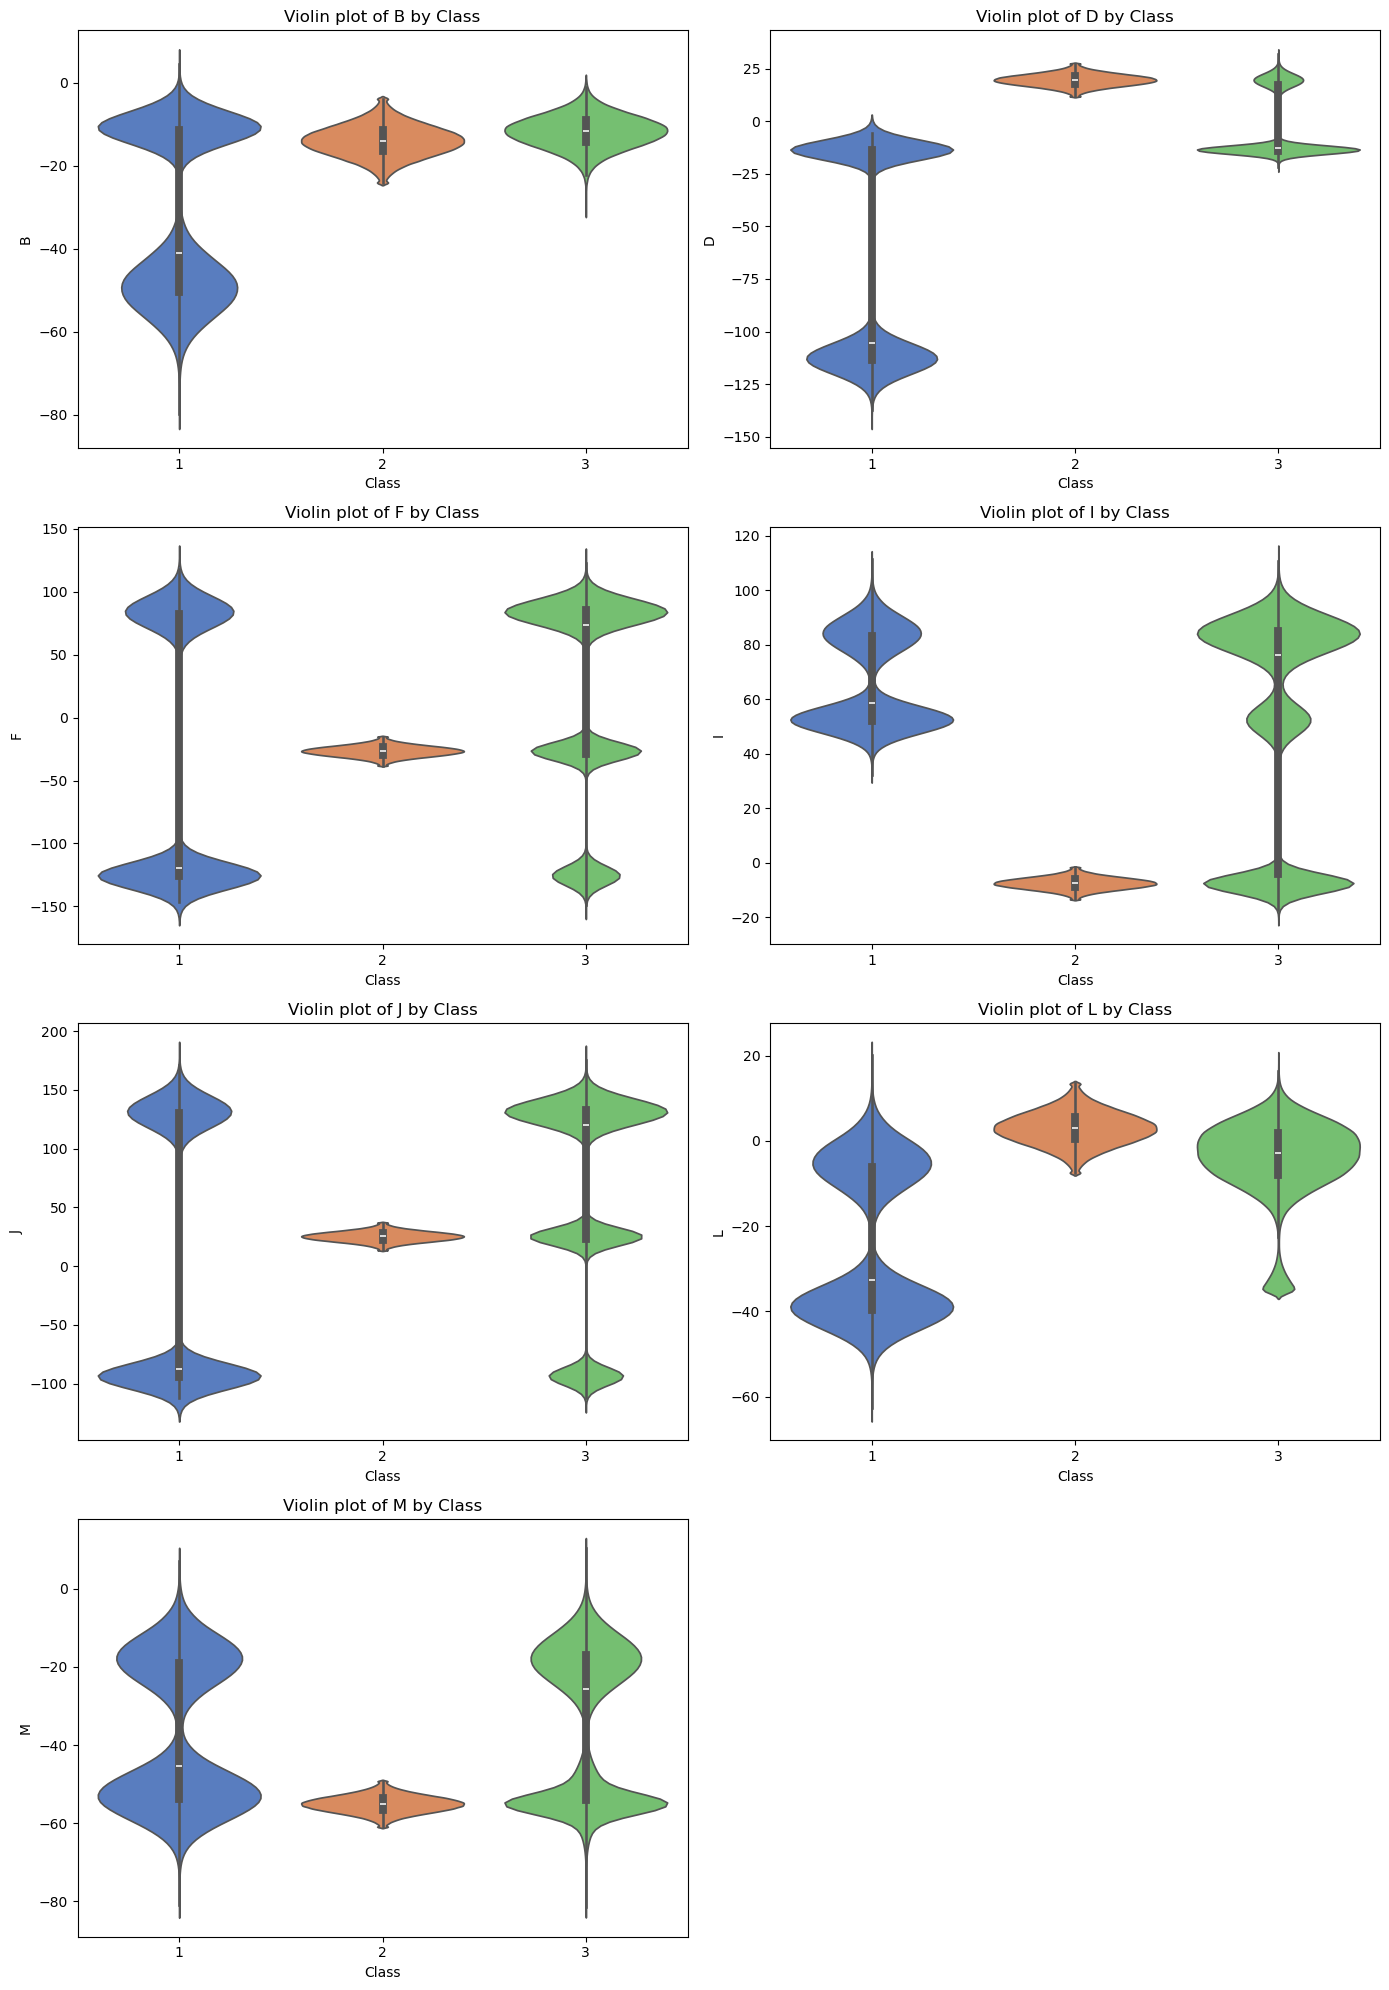

In [10]:
target_column = 'Class'

# Separate features and target
features = df.drop(columns=[target_column]).columns
target = df[target_column]

# Set up the plotting grid
num_features = len(features)
num_cols = 2  # Two features per row
num_rows = (num_features + 1) // num_cols

plt.figure(figsize=(14, 5 * num_rows))

# Loop through each feature
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(data=df, x=target_column, y=feature, palette="muted")
    plt.title(f'Violin plot of {feature} by {target_column}')

plt.tight_layout()
plt.show()

### Observation:
These plots further validate our observation that there is no clear and clean separation between the classes based on feature values.

### Key Takeaways:
The Data Analysis section reveals key challenges in the dataset:
1.	Class imbalance in the target variable
2.	Presence of outliers
3.	Persistent multicollinearity among features
4.	Lack of clear class separation
5.	Significant variation in feature scales
6.	High variability in many features

We need a robust machine learning model to solve above problems.